In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import chi2_contingency
import openpyxl
import category_encoders as ce

from imblearn.over_sampling import  SMOTE
from imblearn.under_sampling import  NearMiss

from sklearn.metrics import classification_report, roc_auc_score, recall_score

In [ ]:
df = pd.read_excel('data.xlsx')
df.head()

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        50684 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_karyawan,54808.0,54346.830627,22586.581449,15152.0,34820.75,54376.5,73881.5,93449.0
jumlah_training,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
umur,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
rating_tahun_lalu,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
masa_kerja,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPI_>80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
penghargaan,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
rata_rata_skor_training,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
dipromosikan,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [ ]:
df.describe(include=object).transpose()

,count,unique,top,freq
departemen,54808,9,Sales & Marketing,16840
wilayah,54808,34,wilayah_2,12343
pendidikan,52399,3,Bachelor's,36669
jenis_kelamin,54808,2,m,38496
rekrutmen,54808,3,other,30446


In [ ]:
df.isnull().sum()/len(dev)

id_karyawan                0.000000
departemen                 0.000000
wilayah                    0.000000
pendidikan                 0.054942
jenis_kelamin              0.000000
rekrutmen                  0.000000
jumlah_training            0.000000
umur                       0.000000
rating_tahun_lalu          0.094056
masa_kerja                 0.000000
KPI_>80%                   0.000000
penghargaan                0.000000
rata_rata_skor_training    0.000000
dipromosikan               0.000000
dtype: float64

In [ ]:
((df['rating_tahun_lalu'].isnull()) & (df['masa_kerja'] == 1)).sum() == df['rating_tahun_lalu'].isnull().sum()

True

In [ ]:
def analyze(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analysis():
  result = pd.DataFrame()

  for col in df_num.columns:
    analysis = analyze(df[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(nrows=2,
                                      sharex=True,
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})

  info = analyze(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

In [ ]:
dataframe_analysis()

,Column,Mean,Mode,Median,Variance,Standard Deviation,Skew
0,jumlah_training,1.253011,1.0,1.0,0.371203,0.609264,3.445434
1,umur,34.803915,30.0,33.0,58.678192,7.660169,1.007432
2,rating_tahun_lalu,NaN,3.0,3.0,NaN,NaN,-0.310638
3,masa_kerja,5.865512,3.0,5.0,18.191028,4.265094,1.738061
4,KPI_>80%,0.351974,0.0,0.0,0.228093,0.477590,0.619909
5,penghargaan,0.023172,0.0,0.0,0.022635,0.150450,6.338914
6,rata_rata_skor_training,63.386750,50.0,60.0,178.798603,13.371559,0.451908
7,dipromosikan,0.085170,0.0,0.0,0.077918,0.279137,2.972339


Plot Disctribution Column :  jumlah_training


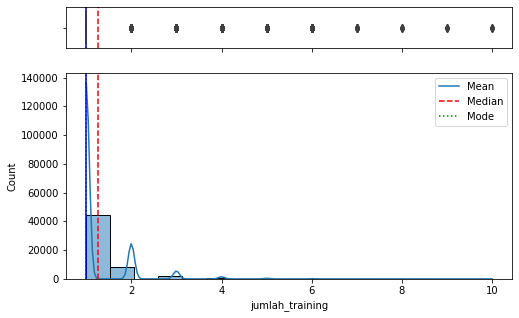

Plot Disctribution Column :  umur


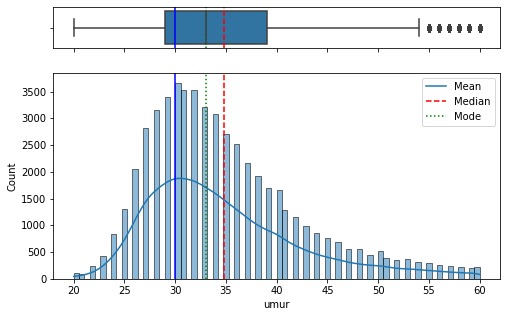

Plot Disctribution Column :  rating_tahun_lalu


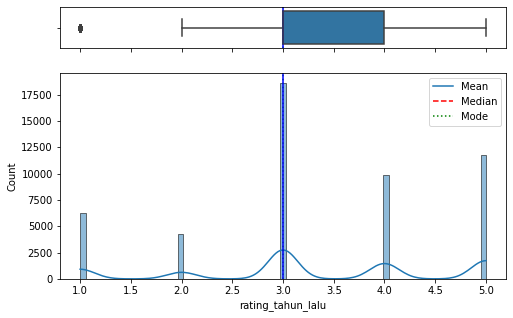

Plot Disctribution Column :  masa_kerja


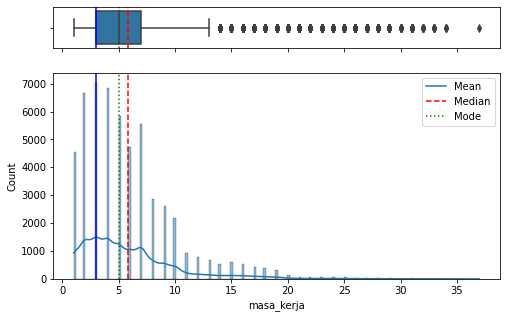

Plot Disctribution Column :  KPI_>80%


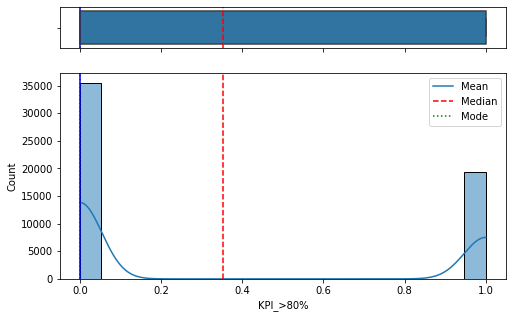

Plot Disctribution Column :  penghargaan


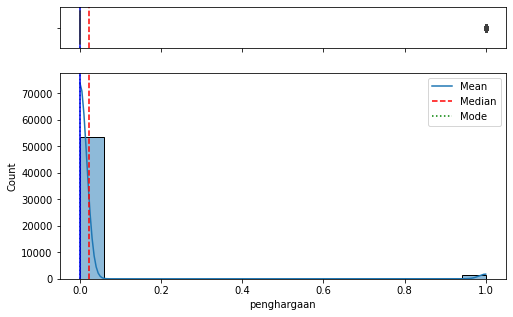

Plot Disctribution Column :  rata_rata_skor_training


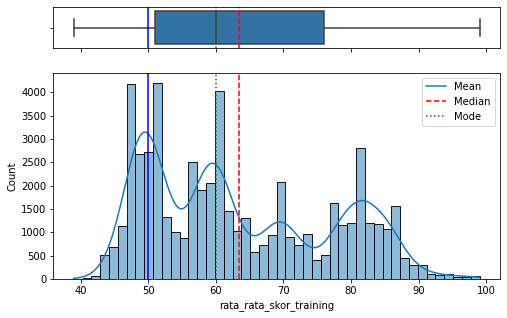

Plot Disctribution Column :  dipromosikan


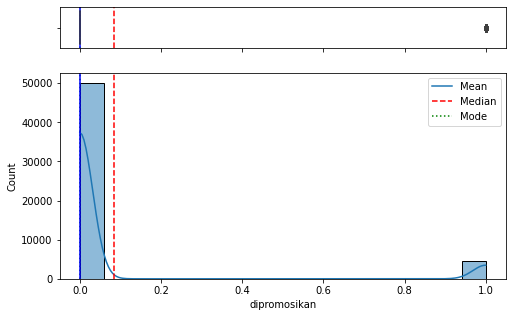

In [ ]:
for col in df_num.columns:
    print("Plot Disctribution Column : ", col)
    plot_distribution(df_num[col])
    print("=======================")

#Data Preprocessing

In [ ]:
df.drop(columns=['id_karyawan', 'wilayah'], axis = 1, inplace=True)

In [ ]:
df.head()

,departemen,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df['pendidikan'].fillna(df['pendidikan'].mode().iloc[0],inplace = True)

In [ ]:
df['rating_tahun_lalu'].fillna(df['rating_tahun_lalu'].mean(),inplace = True)

In [ ]:
df.isnull().sum()

departemen                 0
pendidikan                 0
jenis_kelamin              0
rekrutmen                  0
jumlah_training            0
umur                       0
rating_tahun_lalu          0
masa_kerja                 0
KPI_>80%                   0
penghargaan                0
rata_rata_skor_training    0
dipromosikan               0
dtype: int64

# Data Split

We've learned from EDA that our independent variable exhibits imbalanced traits. When applying balancing methods, it's vital to consider the sampling technique and .fit/.transform process. The sampling method deserves attention. For example, random data separation into training, validation, and test sets may alter class distribution. In one case, a 70% positive and 30% negative class distribution became 71%:29%, 68%:32%, and 72%:28% in the sets. This sampling method risks being non-representative and introducing bias.

In a 60-20-20 Data Split, only training and validation data are manipulated.

In [ ]:
X = df.drop(columns=['dipromosikan'], axis = 1)
y = df['dipromosikan']

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2021)

### 3. Feature Selection

Feature selection is utilized to perform the selection of features used in modeling. We choose features that are essential or impactful on the target variable. Feature selection can also be viewed as a method of generalization. When there are too many features involved in the modeling process, the model tends to overfit, and if there are too few features, the model becomes underfit.

Using fewer features in modeling can lead to a simpler interpretation of the model. Essentially, we aim for a simple model while still maintaining good performance. For instance, if we have 7 variables, X1 to X7, it turns out that by using only X1, X4, and X6, we can achieve a well-performing machine learning model.

Moving forward, we will conduct feature selection to identify the most suitable features for our binary classification problem. We will employ the Chi-square test for categorical features and ANOVA F-statistics for numerical features.

In [ ]:
X_train_cat = X_train_val.select_dtypes(include = 'object').copy()
X_train_num = X_train_val.select_dtypes(include = 'number').copy()

In [ ]:
X_train_cat.columns

Index(['departemen', 'pendidikan', 'jenis_kelamin', 'rekrutmen'], dtype='object')

In [ ]:
X_train_num.columns

Index(['jumlah_training', 'umur', 'rating_tahun_lalu', 'masa_kerja',
       'KPI_>80%', 'penghargaan', 'rata_rata_skor_training'],
      dtype='object')

### 3.1 Chi-square

Are the two categorical variables independent or related to each other? For instance, we will test one categorical feature in our data, namely ```pendidikan``` . Does a person's education have a dependency with whether they are promoted or not?

We can formulate the hypotheses as follows:

1. Ho: Both variables are independent, meaning the ```pendidikan```   variable is not related or independent of the variable.
2. Ha: Both variables are dependent, meaning the ```pendidikan``` variable is related or dependent on the variable.
Ho is rejected when the P-Value is less than or equal to alpha (α). We will use an alpha value of 0.05.


In [ ]:
chi2_check = {}

for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train_val, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

In [ ]:
# convert dari dictionary ke DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,departemen,0.000000e+00
1,pendidikan,3.700000e-09
2,rekrutmen,2.519587e-02
3,jenis_kelamin,5.363700e-01


### 3.2 F-Statistic

The F-test (F-Statistic) is employed to examine whether independent variables significantly influence the dependent variable. The F-test assumes that errors follow a normal distribution. If the errors do not exhibit normal distribution, the test results will be invalid. The Null Hypothesis of this test states that the independent variables do not have a significant effect on the dependent variable, while the alternative hypothesis suggests that the independent variables do have a significant effect on the dependent variable. The test statistic used in this test is the F statistic, and the rejection criteria for the Null Hypothesis is a p-value < alpha. The variables used in this F-test are numeric features.


In [ ]:
F_statistic, p_values = f_classif(X_train_num, y_train_val)

In [ ]:
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values,
					'F-Score': F_statistic, 'p values': p_values.round(decimals=3)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

In [ ]:
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,KPI_>80%,2246.968365,0.000
1,penghargaan,1714.529784,0.000
2,rata_rata_skor_training,1458.047826,0.000
3,rating_tahun_lalu,1034.002906,0.000
4,jumlah_training,28.793171,0.000
5,umur,10.897776,0.001
6,masa_kerja,7.531728,0.006


Statistik F ANOVA untuk 6 fitur numerik menunjukkan rentang nilai F yang luas. Kita akan  simpan semua fitur ini untuk tetap digunakan dalam permodelan karena mempunyai ```p-value``` < 0.05

<AxesSubplot:>

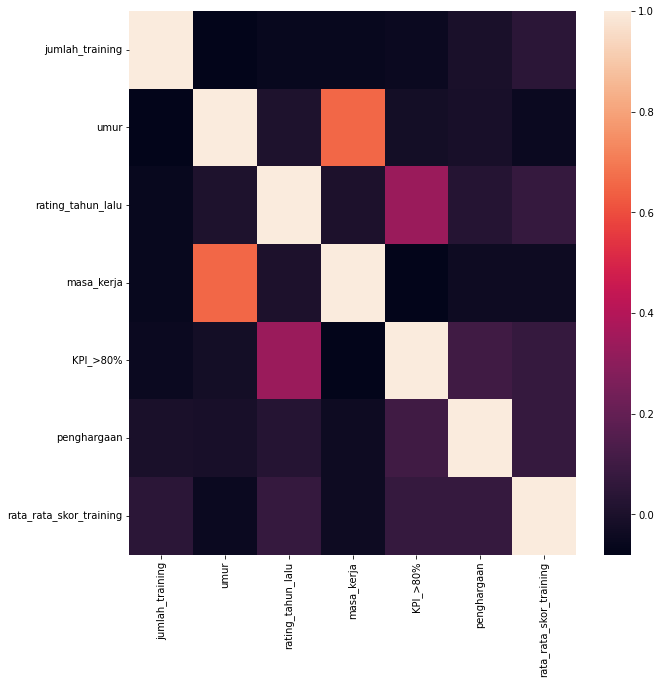

In [ ]:
corrmat = X_train_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat)

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X_train_num).sort_values('VIF')

,variables,VIF
5,penghargaan,1.039747
4,KPI_>80%,1.772943
3,masa_kerja,4.780277
0,jumlah_training,4.819357
2,rating_tahun_lalu,8.729711
6,rata_rata_skor_training,15.449912
1,umur,22.300026


In [ ]:
X_test.drop(columns=['umur'], axis = 1, inplace=True)
X_train_val.drop(columns=['umur'], axis = 1, inplace=True)

In [ ]:
df.head()

,departemen,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### 4. Feature Engineering

In [ ]:
enc = ['rating_tahun_lalu', 'masa_kerja', 'rata_rata_skor_training', 'jumlah_training']

In [ ]:
ordinal_mapping = [
    {'col':'pendidikan',
    'mapping':{'Below Secondary':1,'Bachelor\'s':2,'Master\'s & above':3,'Sun':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = 'pendidikan',mapping = ordinal_mapping)

In [ ]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(),['departemen','jenis_kelamin','rekrutmen']),
                                 ('binary encoder',ordinal_encoder,['pendidikan']),
                                 ('robust scaler',RobustScaler(),enc)
                                ], remainder = 'passthrough')

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train_val)
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,-0.25,-0.40,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,-1.0,0.25,0.68,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2.0,-0.50,0.88,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,-1.0,0.00,-0.08,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,-2.0,3.25,0.80,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.25,0.56,0.0,1.0,0.0
43842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,2.0,-0.50,0.92,1.0,1.0,0.0
43843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.0,-2.0,0.00,-0.44,0.0,1.0,0.0
43844,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,-0.25,0.32,0.0,0.0,0.0


In [ ]:
transformer.transformers_

[('one hot encoder',
  OneHotEncoder(),
  ['departemen', 'jenis_kelamin', 'rekrutmen']),
 ('binary encoder',
  OrdinalEncoder(cols=['pendidikan'],
                 mapping=[{'col': 'pendidikan',
                           'mapping': {"Bachelor's": 2, 'Below Secondary': 1,
                                       "Master's & above": 3, 'Sun': 4}}]),
  ['pendidikan']),
 ('robust scaler',
  RobustScaler(),
  ['rating_tahun_lalu', 'masa_kerja', 'rata_rata_skor_training']),
 ('remainder', 'passthrough', [4, 7, 8])]

In [ ]:
transformer.transformers_[0][1].get_feature_names()

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Analytics', 'x0_Finance', 'x0_HR', 'x0_Legal', 'x0_Operations',
       'x0_Procurement', 'x0_R&D', 'x0_Sales & Marketing',
       'x0_Technology', 'x1_f', 'x1_m', 'x2_other', 'x2_referred',
       'x2_sourcing'], dtype=object)

In [ ]:
transformer.transformers_[1][1].get_feature_names()

['pendidikan']

In [ ]:
features = list(['x0_Analytics', 'x0_Finance', 'x0_HR', 'x0_Legal', 'x0_Operations', 'x0_Procurement',
 'x0_R&D', 'x0_Sales & Marketing', 'x0_Technology', 'pendidikan_scaled', 'x1_f', 'x1_m','x2_other', 'x2_referred',
 'x2_sourcing', 'jumlah_training_scaled','rating_tahun_lalu_scaled', 'masa_kerja', 'KPI_>80%', 'penghargaan', 'rata_rata_skor_training_scaled'])

In [ ]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Analytics,x0_Finance,x0_HR,x0_Legal,x0_Operations,x0_Procurement,x0_R&D,x0_Sales & Marketing,x0_Technology,pendidikan_scaled,...,x1_m,x2_other,x2_referred,x2_sourcing,jumlah_training_scaled,rating_tahun_lalu_scaled,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,-0.25,-0.40,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,-1.0,0.25,0.68,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2.0,-0.50,0.88,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,-1.0,0.00,-0.08,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,-2.0,3.25,0.80,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.25,0.56,0.0,1.0,0.0
43842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,2.0,-0.50,0.92,1.0,1.0,0.0
43843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.0,-2.0,0.00,-0.44,0.0,1.0,0.0
43844,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,-0.25,0.32,0.0,0.0,0.0


### 5. Handling Imbalanced Data

In [ ]:
near = NearMiss()
X_under, y_under = near.fit_resample(X_train_preprocessed, y_train_val)

In [ ]:
X_under.shape

(7468, 21)

In [ ]:
smote = SMOTE()
X_over, y_over = smote.fit_resample(X_train_preprocessed, y_train_val)

In [ ]:
X_over.shape

(80224, 21)

## Modeling

--------------------

In [ ]:
X_train_under, X_val_under, y_train_under, y_val_under = train_test_split(
    X_under,
    y_under,
    stratify = y_under,
    test_size = 0.25,
    random_state = 2021)

In [ ]:
X_train_over, X_val_over, y_train_over, y_val_over = train_test_split(
    X_over,
    y_over,
    stratify = y_over,
    test_size = 0.25,
    random_state = 2021)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier(n_neighbors = 3)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
rf = RandomForestClassifier(n_estimators = 50, max_features = 4, max_depth = 3)
cb = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

1.1 Baseline Model untuk Undersampling

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, classification_report, f1_score,recall_score

In [ ]:
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Decision Tree:
Recall :  0.5541264737406216
ROC - AUC 0.7583266201679554
Random Forest:
Recall :  0.6784565916398714
ROC - AUC 0.7953310795458458
AdaBoost:
Recall :  0.7341907824222936
ROC - AUC 0.7793009586629669
LogisticRegression:
Recall :  0.7277599142550911
ROC - AUC 0.7926808136585948
KNeighborsClassifier:
Recall :  0.6806002143622722
ROC - AUC 0.7610709851254616
0:	learn: 0.6253632	total: 41.8ms	remaining: 41.8ms
1:	learn: 0.5679052	total: 44.5ms	remaining: 0us
CatBoostClassifier:
Recall :  0.6741693461950696
ROC - AUC 0.718240990014023


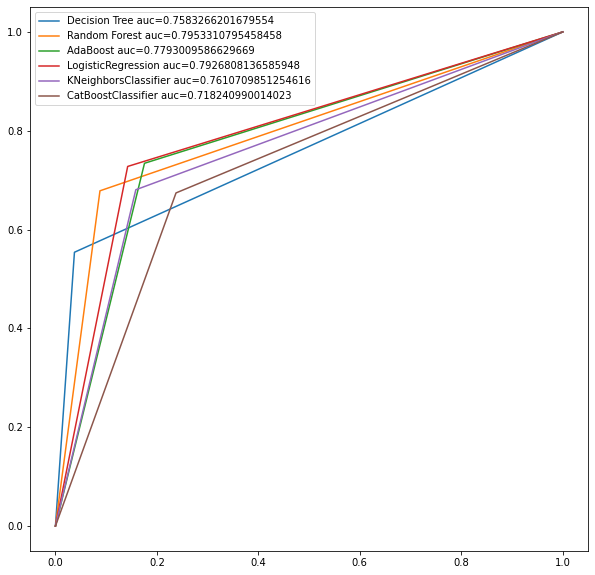

In [ ]:
plt.figure(figsize= (10,10)).clf()

for clfs, clf_name in zip([dt,rf,ada, lr, knn, cb],['Decision Tree','Random Forest','AdaBoost', 'LogisticRegression', 'KNeighborsClassifier', 'CatBoostClassifier']):
  clfs.fit(X_train_under, y_train_under)
  y_pred = clfs.predict(X_val_under)
  fpr, tpr, thresh = metrics.roc_curve(y_val_under,y_pred)
  auc = metrics.roc_auc_score(y_val_under,y_pred)
  print(clf_name+":")
  print('Recall : ', recall_score(y_val_under,y_pred))
  print('ROC - AUC', auc)
  plt.plot(fpr,tpr,label= clf_name +" auc="+str(auc))

plt.legend(loc=0)

1.2 Baseline Model untuk Oversampling

Decision Tree:
Recall :  0.919625049860391
ROC - AUC 0.797965696051057
Random Forest:
Recall :  0.854507379337854
ROC - AUC 0.7706920622257678
AdaBoost:
Recall :  0.9312923813322697
ROC - AUC 0.9530315117670523
LogisticRegression:
Recall :  0.8363581970482649
ROC - AUC 0.7968687674511369
KNeighborsClassifier:
Recall :  0.9240127642600718
ROC - AUC 0.9034204228161149
0:	learn: 0.5416810	total: 61.1ms	remaining: 61.1ms
1:	learn: 0.5088033	total: 68.2ms	remaining: 0us
CatBoostClassifier:
Recall :  0.8125249301954527
ROC - AUC 0.7426206621459912


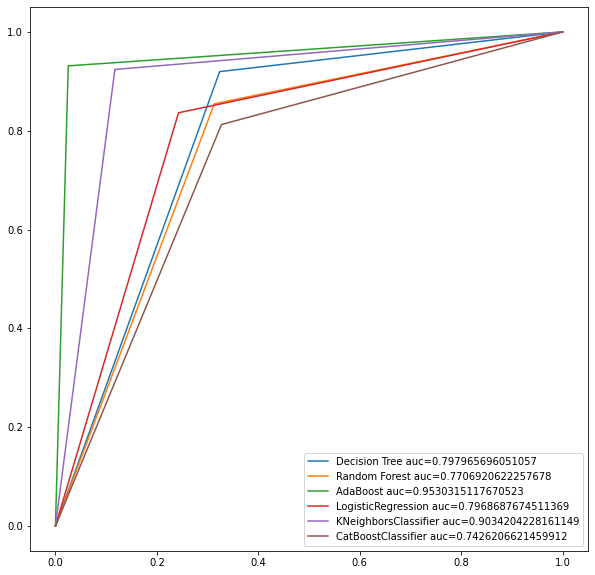

In [ ]:
plt.figure(figsize= (10,10)).clf()

for clfs, clf_name in zip([dt,rf,ada, lr, knn, cb],['Decision Tree','Random Forest','AdaBoost', 'LogisticRegression', 'KNeighborsClassifier', 'CatBoostClassifier']):
  clfs.fit(X_train_over, y_train_over)
  y_pred = clfs.predict(X_val_over)
  fpr, tpr, thresh = metrics.roc_curve(y_val_over,y_pred)
  auc = metrics.roc_auc_score(y_val_over,y_pred)
  print(clf_name+":")
  print('Recall : ', recall_score(y_val_over,y_pred))
  print('ROC - AUC', auc)
  plt.plot(fpr,tpr,label= clf_name +" auc="+str(auc))

plt.legend(loc=0)

The F-Statistic test assesses if independent variables impact the performance of all single classifiers, with ```oversampling```  showing better results compared to ```undersampling```. This could be because ```undersampling``` leads to loss of crucial information. Therefore, ```oversampling``` data will be used for future scenarios.

In [ ]:
vc = VotingClassifier([('clf1',lr),('clf2',dt),('clf3',knn), ('clf4',ada),('clf5',rf),('clf6',cb)], voting = 'soft')

In [ ]:
vc.fit(X_train_over, y_train_over)

0:	learn: 0.5416810	total: 25.9ms	remaining: 25.9ms
1:	learn: 0.5088033	total: 39.1ms	remaining: 0us


VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2', DecisionTreeClassifier(max_depth=5)),
                             ('clf3', KNeighborsClassifier(n_neighbors=3)),
                             ('clf4',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                 n_estimators=100)),
                             ('clf5',
                              RandomForestClassifier(max_depth=3,
                                                     max_features=4,
                                                     n_estimators=50)),
                             ('clf6',
                              <catboost.core.CatBoostClassifier object at 0x000001974754D220>)],
                 voting='soft')

In [ ]:
y_pred = vc.predict(X_val_over)

In [ ]:
print(classification_report(y_val_over,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     10028
           1       0.81      0.97      0.88     10028

    accuracy                           0.87     20056
   macro avg       0.89      0.87      0.87     20056
weighted avg       0.89      0.87      0.87     20056



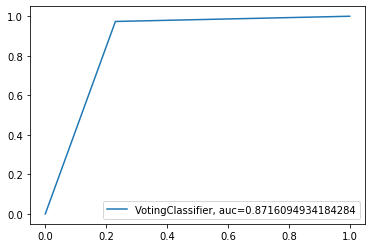

In [ ]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_val_over, y_pred)
auc = metrics.roc_auc_score(y_val_over, y_pred)
plt.plot(fpr,tpr,label="VotingClassifier, auc="+str(auc))
plt.legend(loc=0)

## Testing

In [ ]:
y_pred = vc.predict(X_test_preprocessed)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     10028
           1       0.24      0.78      0.37       934

    accuracy                           0.78     10962
   macro avg       0.61      0.78      0.62     10962
weighted avg       0.91      0.78      0.82     10962



In [ ]:
roc_auc_score(y_test,y_pred)

0.7770502763568218

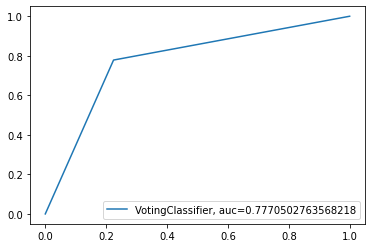

In [ ]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="VotingClassifier, auc="+str(auc))
plt.legend(loc=0)

## What is my advice for deploying and maintaining this model lifecycle?

---------



Deployment is an iterative process. Once we deploy a model, there will inevitably be changes in the future, whether in terms of data, specific phenomena, dynamic business requirements, or other factors. When deploying a machine learning model, continuous monitoring is essential. This monitoring can be categorized into various aspects: data versioning, dictionary versioning, feature versioning, algorithm versioning, transfer learning, and interpretation versioning.

### 1. Data Versioning

The data will continue to grow over time, whether it be an increase in rows or columns. Initially, we had around 55,000 rows of data in this HR department dataset. The data then increased significantly to 80,000 rows. Column-wise changes are also possible. Changes in terms of rows and columns can mark the beginning of other discussed alterations.
### 2. Dictionary Versioning

Let's say at the moment we are in the process of developing a credit scoring model. Currently, we are working on a model to predict which employees will be promoted. We are highlighting several features., ```'departemen', 'pendidikan', 'jenis_kelamin', 'rekrutmen','jumlah_training', 'umur', 'rating_tahun_lalu', 'masa_kerja', 'KPI_>80%', 'penghargaan', 'rata_rata_skor_training', 'dipromosikan'```. Dapat kalian lihat dictionary dari variabel tersebut. Beberapa waktu kemudian ketika cek lagi dictionary-nya ternyata ada perubahan. Pada variabel ```pendidikan``` terdapat kategori baru yaitu post-doctoral. Begitu juga dengan variabel ```departemen```, there is a new department, namely the Data Department. This change undoubtedly has the potential to render the previously constructed machine learning models irrelevant.
### 3. Feature Versioning

We have already discussed the addition of columns to the data. This implies that the features we utilize for constructing a machine learning model may increase. The introduction of new features could also entail the incorporation of novel feature engineering. For instance, in previous model creation, certain variables were not present. ```income```. The variable ```income``` is now included and can be combined with ```average_training_score``` to create a new variable. Existing features may also become irrelevant over time due to different factors.

### 4. Algorithm Versioning

The alteration of the data has the potential to influence the outcomes of our previous work. For instance, here I have conducted training on our models: Random Forest Classifier, Decision Tree Classifier, AdaBoost Classifier, KNN, Logistic Regression, and CatBoostClassifier. The victorious model is AdaBoost with a recall of 93%. In the subsequent period, we retrain the models using updated data, and the winning model changes. The most superior model is now Logistic Regression with a recall of 95%.

### 5. Interpretation Versioning

Sustaining awareness of evolving data and trends is essential for optimizing insights derived from machine learning